In [1]:
from datetime import date
import h5py
import matplotlib.pyplot as plt
from matplotlib import colors
from pathlib import Path
import numpy as np

# Test should run from root
import os

os.chdir("..")

## SPL3SMP_E
This Level-3 (L3) soil moisture product provides a daily composite of global land surface conditions retrieved by both the Soil Moisture Active Passive (SMAP) radar and radiometer. SMAP L-band soil moisture data are resampled to an Earth-fixed, global, cylindrical 9 km Equal-Area Scalable Earth Grid, Version 2.0 (EASE-Grid 2.0).

In [2]:
from omegaconf import OmegaConf
from metaearth.api import extract_assets
from metaearth.config import ConfigSchema

cfg = OmegaConf.load("config/smap.yml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

print(OmegaConf.to_yaml(cfg))

# Constrain the test to only pull one item
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1

success = extract_assets(cfg)
print("Successfully extracted assets." if success else "Asset extraction failed.")

/shared/ritwik/miniconda3/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
07:31:37 INFO - Extraction details for provider ProviderKey.EARTHDATA with collection SPL3SMP_E: 
id: SPL3SMP_E
assets:
- all
outdir: null
datetime: null
aoi_file: null
max_items: 1



default_collection:
  id: null
  assets: null
  outdir: data
  datetime: 2022-08-04/2022-08-07
  aoi_file: config/aoi/conus-expanded.json
  max_items: -1
providers:
- id: EARTHDATA
  kwargs:
    subprovider_id: NSIDC_ECS
  collections:
  - id: SPL3SMP_E
    assets:
    - all
    outdir: null
    datetime: null
    aoi_file: null
    max_items: -1
system:
  log_outdir: ./logs
  log_level: INFO
  dry_run: false
  max_concurrent_extractions: 5
  max_download_attempts: 3
  remove_existing_if_wrong_size: true
  query_asset_sizes: false
run_id: ''



07:31:38 INFO - EarthData Provider returned 1 items for SPL3SMP_E for datetime 2022-08-04/2022-08-07
07:31:38 INFO - 2 assets have unknown file size
07:31:38 INFO - 

****************************************************************************************************
To Extract:
EarthData Provider: SPL3SMP_E.v005


Collection               | Key                 | Description
--------------------------------------------------------------------------------
SPL3SMP_E.v005           | data                | 
SPL3SMP_E.v005           | metadata            | 


Collection size                     0 MB
Size of remaining data to download  0 MB
Number of assets with unknown size: 2

****************************************************************************************************

07:31:38 INFO - Starting data download
Assets: 100%|██████████| 2/2 [00:56<00:00, 28.37s/it]

Successfully extracted assets.


In [3]:
# Find the correct H5 file and load it
# We avoid hardcoding the path here in case the API changes down the road

fpath = Path(cfg["default_collection"]["outdir"])
collection_for_nb = "SPL3SMP_E"
nc_files = list((fpath / collection_for_nb).glob("**/*.h5"))

# We know there is only one file pulled, assert
assert (
    len(nc_files) == 1
), f"There were {len(nc_files)} files pulled. `max_items: 1` failed to constrain."

fpath = nc_files[0]
hfile = h5py.File(fpath)

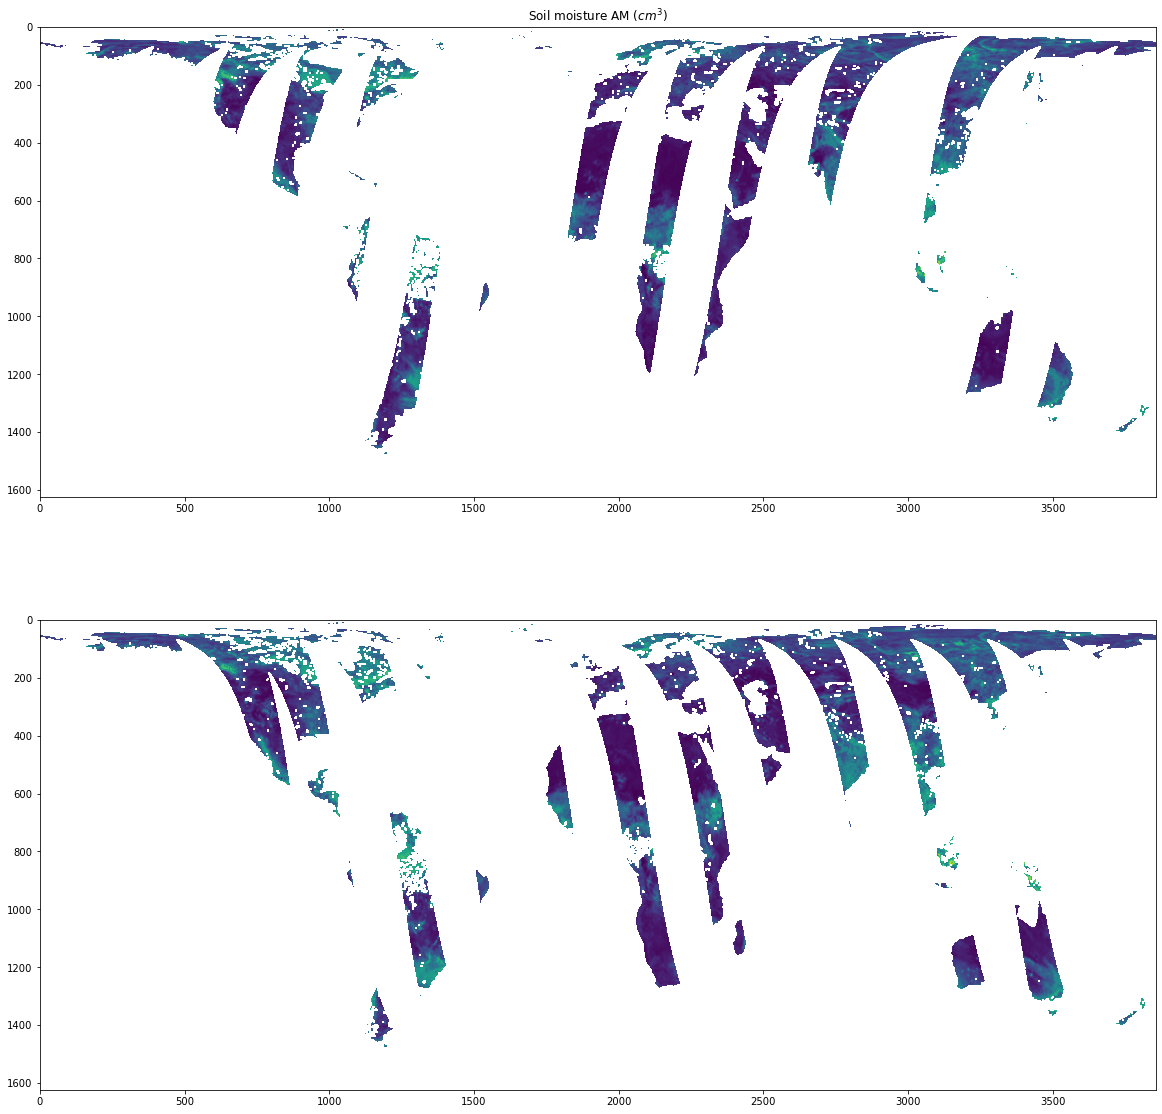

In [4]:
soil_moisture_am = hfile["Soil_Moisture_Retrieval_Data_AM"]["soil_moisture"][:]
soil_moisture_pm = hfile["Soil_Moisture_Retrieval_Data_PM"]["soil_moisture_pm"][:]

# Do not display NODATA values
soil_moisture_am[soil_moisture_am == -9999.0] = np.nan
soil_moisture_pm[soil_moisture_pm == -9999.0] = np.nan

fig, ax = plt.subplots(2, 1, figsize=(20, 20))
ax[0].imshow(soil_moisture_am)
ax[0].title.set_text("Soil moisture AM ($cm^3$)")
ax[1].imshow(soil_moisture_pm)